# 랜덤포레스트_실습

# Step0. 공통 모듈 불러오기

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Step1. 데이터 구성하기

In [12]:
ds = pd.read_csv("통신고객이탈.csv", engine = 'python')
ds['CHURN'].replace(to_replace='Active', value = 0, inplace = True)
ds['CHURN'].replace(to_replace='Churned', value = 1, inplace = True)
ds.drop('CUSTOMER_ID', axis = 1, inplace = True)
ds.head()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [ ]:
# 람다로 replace하는 방법
ds_lam = ds['CHURN'].map(lambda x : 1 if x == 'Churned' else 0)

In [13]:
ds.isnull().sum(axis = 0)

CHURN                 0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [14]:
ds_dummy = pd.get_dummies(ds)
ds_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
np.random.seed(seed=1234)
msk = np.random.rand(ds_dummy.shape[0]) < 0.7
ds_train = ds_dummy[msk]
ds_test = ds_dummy[~msk]
ds_train_y = ds_train['CHURN']
ds_train_x = ds_train.drop('CHURN', axis = 1, inplace = False)
ds_test_y = ds_test['CHURN']
ds_test_x = ds_test.drop('CHURN', axis = 1, inplace = False)

print("train data X size : {}".format(ds_train_x.shape))
print("train data Y size : {}".format(ds_train_y.shape))
print("test data X size : {}".format(ds_test_x.shape))
print("test data Y size : {}".format(ds_test_y.shape))


train data X size : (635, 33)
train data Y size : (635,)
test data X size : (295, 33)
test data Y size : (295,)


## 데이터 분할(sklearn의 train_test_split 이용)

In [22]:
ds_y = ds_dummy['CHURN']
ds_x = ds_dummy.drop('CHURN', axis = 1, inplace = False)
ds_train_x2, ds_test_x2, ds_train_y2, ds_test_y2 = train_test_split(ds_x, ds_y, test_size = 0.30, random_state = 1234)

print("train data X size : {}".format(ds_train_x2.shape))
print("train data Y size : {}".format(ds_train_y2.shape))
print("test data X size : {}".format(ds_test_x2.shape))
print("test data y size : {}".format(ds_test_y2.shape))

train data X size : (651, 33)
train data Y size : (651,)
test data X size : (279, 33)
test data y size : (279,)


# Step2. 랜덤 포레스트 모델 생성 

In [23]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(ds_train_x2, ds_train_y2)
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(ds_train_x2, ds_train_y2)))
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(ds_test_x2, ds_test_y2)))

Accuracy on training set : 0.988
Accuracy on test set : 0.867


/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
n_iter_tree = 30
train_accuracy = []
test_accuracy = []
for n_tree in range(n_iter_tree):
    rf1 = RandomForestClassifier(n_estimators= n_tree+1, random_state=1234)
    rf1.fit(ds_train_x2, ds_train_y2)
    train_accuracy.append(rf1.score(ds_train_x2, ds_train_y2))
    test_accuracy.append(rf1.score(ds_test_x2, ds_test_y2))
    
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["NumberofTree"] = [n_tree + 1 for n_tree in range(n_iter_tree)]
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
ds_accuracy1

,NumberofTree,TrainAccuracy,TestAccuracy
0,1,0.920123,0.806452
1,2,0.920123,0.853047
2,3,0.966206,0.860215
3,4,0.961598,0.863799
4,5,0.990783,0.863799
5,6,0.984639,0.870968
6,7,0.992320,0.870968
7,8,0.989247,0.878136
8,9,0.992320,0.863799
9,10,0.987711,0.867384


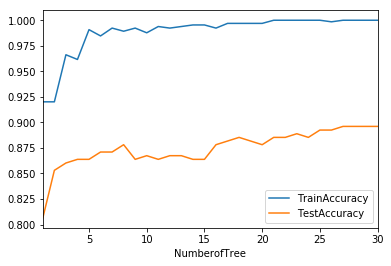

In [26]:
ds_accuracy1.set_index("NumberofTree", inplace = False).plot.line()

In [27]:
train_accuracy = []
test_accuracy = []

para_criterion = ['gini', 'entropy']
for criterion in para_criterion:
    rf2 = RandomForestClassifier(criterion= criterion, random_state= 1234)
    rf2.fit(ds_train_x2, ds_train_y2)
    train_accuracy.append(rf2.score(ds_train_x2, ds_train_y2))
    test_accuracy.append(rf2.score(ds_test_x2, ds_test_y2))
    
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Criterion,TrainAccuracy,TestAccuracy
0,gini,0.987711,0.867384
1,entropy,0.993856,0.863799


In [28]:
train_accuracy = []; test_accuracy = [];
para_max_depth = [i + 1 for i in range(10)] * 2
n_iter_depth = 10
para_criterion = ["gini"] * n_iter_depth + ["entropy"] * n_iter_depth
for (criterion, depth) in zip(para_criterion, para_max_depth):
    rf3 = RandomForestClassifier(criterion=criterion, max_depth=depth, random_state=1234)
    rf3.fit(ds_train_x2, ds_train_y2)
    train_accuracy.append(rf3.score(ds_train_x2, ds_train_y2))
    test_accuracy.append(rf3.score(ds_test_x2, ds_test_y2))

ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
ds_accuracy3

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.791091,0.842294
1,gini,2,0.838710,0.860215
2,gini,3,0.844854,0.863799
3,gini,4,0.872504,0.853047
4,gini,5,0.878648,0.878136
5,gini,6,0.929339,0.881720
6,gini,7,0.915515,0.878136
7,gini,8,0.929339,0.885305
8,gini,9,0.935484,0.874552
9,gini,10,0.956989,0.870968


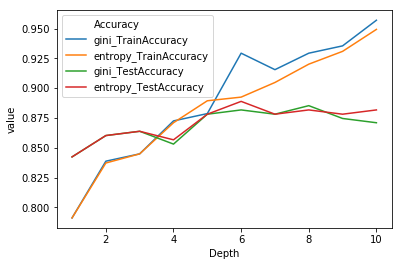

In [29]:
ds_accuracy3_melt = pd.melt(ds_accuracy3, id_vars = ["Criterion", "Depth"])
ds_accuracy3_melt["Accuracy"] = ds_accuracy3_melt["Criterion"] + "_" + ds_accuracy3_melt["variable"]
sns.lineplot(x = "Depth", y = "value", hue = "Accuracy", data = ds_accuracy3_melt)

In [33]:
train_accuracy = []
test_accuracy = []
n_depth = 4
n_iter_min_leaf_size = 10
para_criterion = ["gini"] * n_iter_min_leaf_size
para_min_leaf_size = [i+1 for i in range(n_iter_min_leaf_size)]

for (criterion, leafsize) in zip(para_criterion, para_min_leaf_size):
    rf4 = RandomForestClassifier(criterion=criterion, max_depth=n_depth, min_samples_leaf=leafsize, random_state=1234)
    rf4.fit(ds_train_x2, ds_train_y2)
    train_accuracy.append(rf4.score(ds_train_x2, ds_train_y2))
    test_accuracy.append(rf4.score(ds_test_x2, ds_test_y2))
    
ds_accuracy4 = pd.DataFrame()
ds_accuracy4["Criterion"] = para_criterion
ds_accuracy4["Depth"] = n_depth
ds_accuracy4["MinLeafSize"] = para_min_leaf_size
ds_accuracy4["TrainAccuracy"] = train_accuracy
ds_accuracy4["TestAccuracy"] = test_accuracy
ds_accuracy4

/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jeong-utae/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

,Criterion,Depth,MinLeafSize,TrainAccuracy,TestAccuracy
0,gini,4,1,0.872504,0.853047
1,gini,4,2,0.861751,0.870968
2,gini,4,3,0.863287,0.870968
3,gini,4,4,0.870968,0.867384
4,gini,4,5,0.864823,0.867384
5,gini,4,6,0.854071,0.870968
6,gini,4,7,0.843318,0.867384
7,gini,4,8,0.843318,0.860215
8,gini,4,9,0.841782,0.860215
9,gini,4,10,0.841782,0.860215


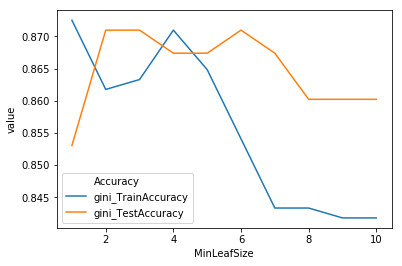

In [34]:
ds_accuracy4_melt = pd.melt(ds_accuracy4, id_vars= ["Criterion", "Depth", "MinLeafSize"])
ds_accuracy4_melt["Accuracy"] = ds_accuracy4_melt["Criterion"] + "_" + ds_accuracy4_melt['variable']
sns.lineplot(x="MinLeafSize", y="value", hue="Accuracy", data=ds_accuracy4_melt)

# Step3. 결론도출

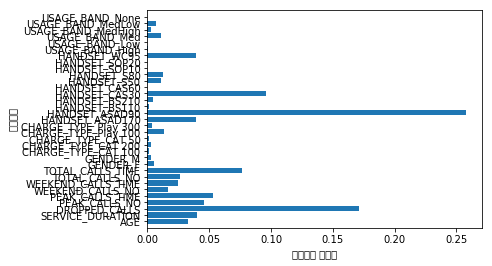

In [35]:
rf_model = RandomForestClassifier(criterion="gini", max_depth = 4, min_samples_leaf=10,
                                 n_estimators=100, random_state=1234)
rf_model.fit(ds_train_x2, ds_train_y2)
ds_feature_importance = pd.DataFrame()
ds_feature_importance["feature"] = ds_train_x.columns
ds_feature_importance["importance"] = rf_model.feature_importances_
ds_feature_importance.sort_values(by="importance",ascending=False)

def plot_feature_importances(model):
    n_features = ds_train_x2.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), ds_train_x2.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1, n_features)
plot_feature_importances(rf_model)